# SIFT features
A small experiment on how SIFT feature work for us. If it's any good, I'll think about incorporating with the others.

In [52]:
import os
import cv2
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [2]:
root_dir = '../../data'
folder = os.listdir(root_dir)[0]
path = glob(root_dir+'/'+folder+'/*.jpg')[0]

In [23]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(img, (5, 5), 0.1)

In [24]:
# SIFT object
sift = cv2.xfeatures2d.SIFT_create()

kp_1, desc_1 = sift.detectAndCompute(img, None)
kp_2, desc_2 = sift.detectAndCompute(blur, None)

In [25]:
# Matching object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(desc_1, desc_2)

In [26]:
matches = sorted(matches, key=lambda x: x.distance)

In [27]:
distances = [x.distance for x in matches]

# SIFT on test images
Parle G FTW

In [32]:
test_path = '../../data/test_images/test_image_1.jpeg'
folders = os.listdir('../../data')
folders.remove('test_images')


Target image ...


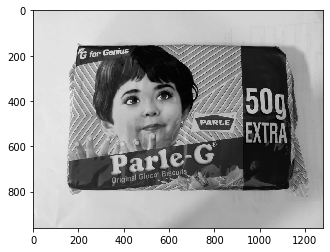


Matched image ...


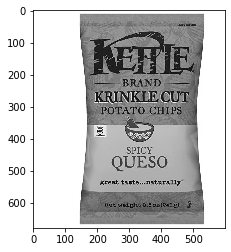

In [53]:
# Generate features for test image
sift = cv2.xfeatures2d.SIFT_create()
test_img = cv2.imread(test_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
_, test_desc = sift.detectAndCompute(test_img, None)
test_desc = test_desc.reshape(-1,)

# Generate bruteforce matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Generate features for other images and match
min_dist = 1e06
min_path = '' 
for folder in tqdm(folders):
    for path in glob('../../data/'+folder+'/*.jpg'):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, desc = sift.detectAndCompute(img, None)
        desc = desc.reshape(-1,)
        
        if len(desc) > len(test_desc):
            desc = desc[:len(test_desc)]
        else:
            desc = np.array(desc.tolist() + [0]*(len(test_desc)-len(desc)))
        
        dist = euclidean(test_desc, desc)
        if dist < min_dist:
            min_dist = cos_dist
            min_path = path
            
min_image = cv2.imread(min_path)
min_image = cv2.cvtColor(min_image, cv2.COLOR_BGR2GRAY)
            
# Show image and matched image
print("Target image ...")
plt.imshow(test_img, cmap='gray')
plt.show()
print("\nMatched image ...")
plt.imshow(min_image, cmap='gray')
plt.show()